In [1]:
from plf.lab import lab_setup

lab_setup(settings_path='/mnt/work/stdML/ExperQuick/PLFML/PLF_mL/PLF_mL.json')

In [3]:
from plf.experiment import PipeLine, get_ppls

In [98]:
# ppl_config.py

ppl_config = {
    'workflow':{
        'loc': "myComps.SimpleRegressionWorkflow",
        'args':{ }
    },
    "args": {
        "loader": {
            'loc': 'myComps.DataLoaderComponent',
            'args':{
                "shuffle": True,              # Shuffle dataset
                "sample_size": 100,           # Take only 300 samples (or None for all)
                "feature_indices": [1, 2, 3,4, 5, 6, 7, 8 ]  # Use selected features (or None for all)
            }
        },
        "preprocessor": {
            'loc': "myComps.PreprocessorComponent",
            'args':{
                "scaler_type": "minmax",    # Options: 'minmax', 'standard', 'robust'
                "log_transform": False        # Whether to apply log(1+x) transform
            }
        },
        "regressor": {
            'loc': "myComps.RegressorComponent",
            'args':{
                "model_type": "linear",        # Options: 'linear', 'ridge', 'lasso', 'rf'
                "model_params": {             # Optional hyperparameters for model
                    # "alpha": 1.0
                }
            }
        },
        "evaluator": {
            'loc': "myComps.EvaluatorComponent",
            'args':{"metrics": ["r2", "rmse", "mae"]}  # Choose metrics to compute
        }
    }
}


In [99]:
P =  PipeLine()
P.verify(cnfg=ppl_config)

False

In [102]:
P.new(pplid='p9',args=ppl_config)

# P.load(pplid='p1')

In [103]:
P.prepare()

In [104]:
P.run()

Metrics: {'r2': 0.5690760491263025, 'rmse': np.float64(51.20590944015483), 'mae': 41.82804684673778}
Model saved at: /mnt/work/stdML/ExperQuick/PLFML/PLF_mL/models/p9.pkl


In [105]:
get_ppls()

['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9']

In [140]:
from plf.experiment import get_ppl_status, get_ppl_details, get_matching_ppls, filter_ppls

In [141]:
get_ppl_details()

,evaluator,regressor,loader,preprocessor
p1,myComps.EvaluatorComponent,myComps.RegressorComponent,myComps.DataLoaderComponent,myComps.PreprocessorComponent
p2,myComps.EvaluatorComponent,myComps.RegressorComponent,myComps.DataLoaderComponent,myComps.PreprocessorComponent
p3,myComps.EvaluatorComponent,myComps.RegressorComponent,myComps.DataLoaderComponent,myComps.PreprocessorComponent
p4,myComps.EvaluatorComponent,myComps.RegressorComponent,myComps.DataLoaderComponent,myComps.PreprocessorComponent
p5,myComps.EvaluatorComponent,myComps.RegressorComponent,myComps.DataLoaderComponent,myComps.PreprocessorComponent
p6,myComps.EvaluatorComponent,myComps.RegressorComponent,myComps.DataLoaderComponent,myComps.PreprocessorComponent
p7,myComps.EvaluatorComponent,myComps.RegressorComponent,myComps.DataLoaderComponent,myComps.PreprocessorComponent
p8,myComps.EvaluatorComponent,myComps.RegressorComponent,myComps.DataLoaderComponent,myComps.PreprocessorComponent
p9,myComps.EvaluatorComponent,myComps.RegressorComponent,myComps.DataLoaderComponent,myComps.PreprocessorComponent


In [142]:
df = get_ppl_status()

<Axes: >

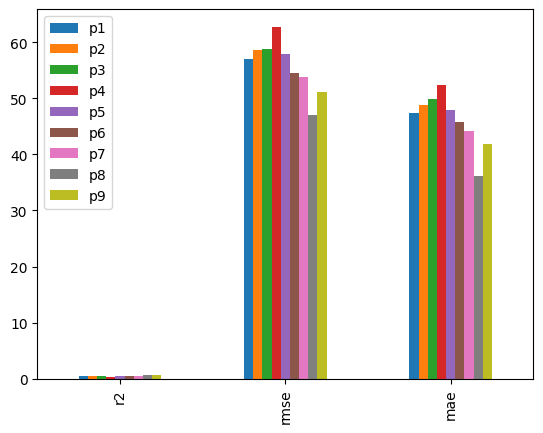

In [152]:
df.T.plot(kind='bar')

In [145]:
qry = 'workflow=myComps.SimpleRegressionWorkflow'


get_matching_ppls(base_pplid='p1')#,query=qry)

{'workflow=myComps.SimpleRegressionWorkflow': ['p2',
  'p3',
  'p4',
  'p5',
  'p6',
  'p7',
  'p8',
  'p9'],
 'args>loader=myComps.DataLoaderComponent': ['p2',
  'p3',
  'p4',
  'p5',
  'p6',
  'p7',
  'p8',
  'p9'],
 'args>preprocessor=myComps.PreprocessorComponent': ['p2',
  'p3',
  'p4',
  'p5',
  'p6',
  'p7',
  'p8',
  'p9'],
 'args>regressor=myComps.RegressorComponent': ['p2',
  'p3',
  'p4',
  'p5',
  'p6',
  'p7',
  'p8',
  'p9'],
 'args>evaluator=myComps.EvaluatorComponent': ['p2',
  'p3',
  'p4',
  'p5',
  'p6',
  'p7',
  'p8',
  'p9']}

In [150]:
filter_ppls(query='loader=myComps.DataLoaderComponent', params=True)

,shuffle,sample_size,feature_indices
p1,True,300,"[0, 2, 4, 6]"
p2,True,300,"[1, 2, 4, 6]"
p3,True,200,"[1, 2, 4, 6]"
p4,True,200,"[1, 2, 4, 6]"
p5,True,100,"[1, 2, 4, 6]"
p6,True,100,"[1, 2, 3, 6]"
p7,True,100,"[1, 2, 3, 6]"
p8,True,100,"[1, 2, 3, 4, 5, 6]"
p9,True,100,"[1, 2, 3, 4, 5, 6, 7, 8]"


In [151]:
filter_ppls(query='regressor=myComps.RegressorComponent', params=True)

,model_type,model_params
p1,ridge,None
p2,ridge,None
p3,ridge,None
p4,ridge,None
p5,ridge,None
p6,ridge,None
p7,linear,None
p8,linear,None
p9,linear,None
